In [90]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import pickle
import warnings

from sklearn.manifold import TSNE
from sklearn.cluster import KMeans
from collections import Counter

warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv("zip_code_age.csv", index_col="Unnamed: 0")
kmeans = pickle.load(open("kmeans.pkl", "rb"))

In [3]:
df.head()

,female_0,female_1,female_2,female_3,female_4,female_5,female_6,female_7,female_8,female_9,...,male_94,male_95,male_96,male_97,male_98,male_99,male_100,male_101,male_102,cluster
10026,216,212,225,189,208,192,190,205,181,195,...,1,1,2,0,0,1,2,1,0,0
10027,354,329,320,323,308,270,291,284,280,284,...,6,3,4,1,2,0,0,0,0,1
10030,167,197,155,191,165,158,150,168,146,150,...,0,1,0,0,0,1,1,0,0,0
10037,81,101,94,93,92,87,64,83,78,83,...,4,4,2,3,1,0,3,0,0,2
10039,184,150,167,152,146,169,152,160,165,178,...,4,0,4,1,0,1,0,0,0,2


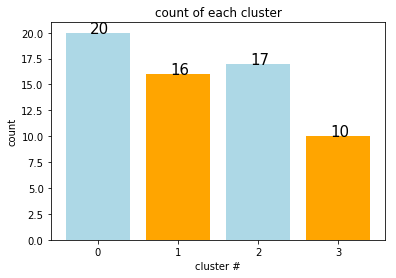

In [4]:
count = Counter(kmeans.best_estimator_.labels_)
x_cluster, y_height = zip(*count.items())

plt.bar(x=x_cluster, height=y_height, tick_label=x_cluster, color=["lightblue", "orange"])
for i, j in count.items(): plt.text(x=i-.1, y=j, s=j, fontdict={"fontsize": 15})
plt.ylabel("count")
plt.xlabel("cluster #")
plt.title("count of each cluster")
plt.show()

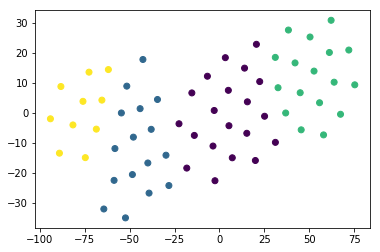

In [20]:
tsne_embedded = TSNE(n_components=2).fit_transform(df)
labels_km4 = kmeans.best_estimator_.labels_
plt.scatter(tsne_embedded[:,0], tsne_embedded[:,1], c=labels_km4)
plt.show()

**Define Age Group as `[0-5 6-12 13-17 18-24 25-34 35-44 45-54 55-64 65+]`**

In [6]:
def generate_age_group_colums(start, end):
    yield from [['female_%s'%age for age in range(start, end+1)], ['male_%s'%age for age in range(start, end+1)]]

In [7]:
age_groups = {(s,e): generate_age_group_colums(s, e)
              for s, e in zip(range(0, 56, 6), range(5, 65, 7))}
age_groups[(65,102)] = generate_age_group_colums(65, 102)

In [8]:
age_groups

{(0, 5): <generator object generate_age_group_colums at 0x1108fca40>,
 (6, 12): <generator object generate_age_group_colums at 0x1108fcaf0>,
 (12, 19): <generator object generate_age_group_colums at 0x1108fcdb0>,
 (18, 26): <generator object generate_age_group_colums at 0x11777a1a8>,
 (24, 33): <generator object generate_age_group_colums at 0x11777a7d8>,
 (30, 40): <generator object generate_age_group_colums at 0x11777a830>,
 (36, 47): <generator object generate_age_group_colums at 0x11777a888>,
 (42, 54): <generator object generate_age_group_colums at 0x11777a8e0>,
 (48, 61): <generator object generate_age_group_colums at 0x11777a938>,
 (65, 102): <generator object generate_age_group_colums at 0x11777a990>}

In [9]:
def create_age_group(df, start, end):
    male_column = "male[%s-%s]" % (start, end)
    female_column = "female[%s-%s]" % (start, end)
    age_group = list(generate_age_group_colums(start, end))
    df[female_column] = np.sum(df[age_group[0]], axis=1)
    df[male_column] = np.sum(df[age_group[1]], axis=1)
    return df

In [10]:
for s, e in age_groups.keys():
    df = create_age_group(df, s, e)

In [11]:
age_group_columns=['%s[%s-%s]'%(g,s,e) for s, e in age_groups.keys() for g in ['female', 'male']]
df_age_gp = df[age_group_columns]
df_age_gp.head()

,female[0-5],male[0-5],female[6-12],male[6-12],female[12-19],male[12-19],female[18-26],male[18-26],female[24-33],male[24-33],female[30-40],male[30-40],female[36-47],male[36-47],female[42-54],male[42-54],female[48-61],male[48-61],female[65-102],male[65-102]
10026,1242,1141,1316,1372,1634,1611,2594,2317,3416,2889,3410,2994,3511,3228,3451,3272,3067,2792,1988,1168
10027,1904,1828,2001,2010,4041,3433,7986,6191,6582,5850,5065,4552,4796,4450,4901,4544,4695,4091,3556,2112
10030,1033,1058,1100,1144,1572,1577,2226,1926,2615,2166,2447,2054,2570,2230,2768,2366,2428,2094,1494,1010
10037,548,504,547,621,816,829,1208,1040,1589,1158,1573,1103,1668,1196,1818,1338,1849,1242,2029,985
10039,968,1035,1142,1198,1457,1453,1819,1714,2200,1722,2268,1818,2287,1956,2398,1936,2180,1580,1834,904


## Cluster's Zip Code

In [115]:
C = [kmeans.best_estimator_.labels_==0,
     kmeans.best_estimator_.labels_==1,
     kmeans.best_estimator_.labels_==2,
     kmeans.best_estimator_.labels_==3]

In [124]:
cluster_zip_code = {i: df_age_gp[c].index for i, c in enumerate(C)}
"Cluster's Zip Code", cluster_zip_code

("Cluster's Zip Code",
 {0: Int64Index([10026, 10030, 10019, 10036, 10035, 10010, 10022, 10012, 10013,
              10014, 10021, 10028, 10065, 10075, 10034, 10040, 11205, 11217,
              11231, 11232],
             dtype='int64'),
  1: Int64Index([10027, 10011, 10016, 10003, 10009, 10128, 10023, 10024, 10031,
              10032, 10033, 11691, 11201, 11215, 11210, 11225],
             dtype='int64'),
  2: Int64Index([10037, 10039, 10001, 10018, 10020, 10017, 10004, 10005, 10006,
              10007, 10038, 10280, 10044, 11692, 11693, 11694, 11697],
             dtype='int64'),
  3: Int64Index([10029, 10002, 10025, 11204, 11218, 11219, 11230, 11203, 11226,
              11220],
             dtype='int64')})

In [126]:
pickle.dump(cluster_zip_code, open("cluster_zip_code.pkl", "wb"))

## Distribution of each Cluster

In [109]:
def plot_cluster_distribution(cluster_idx):
    c = kmeans.best_estimator_.labels_==cluster_idx
    plt.bar(age_group_columns, np.sum(df_age_gp[c], axis=0)/np.sum(c), color=['pink', "lightblue"])
    plt.xticks(rotation=90)
    plt.ylabel("avg count per cluster")
    plt.title("Distribution of Cluster %s (Size: %s)"%(cluster_idx,np.sum(c)))
    plt.ylim([0, 8100])
#     plt.show()

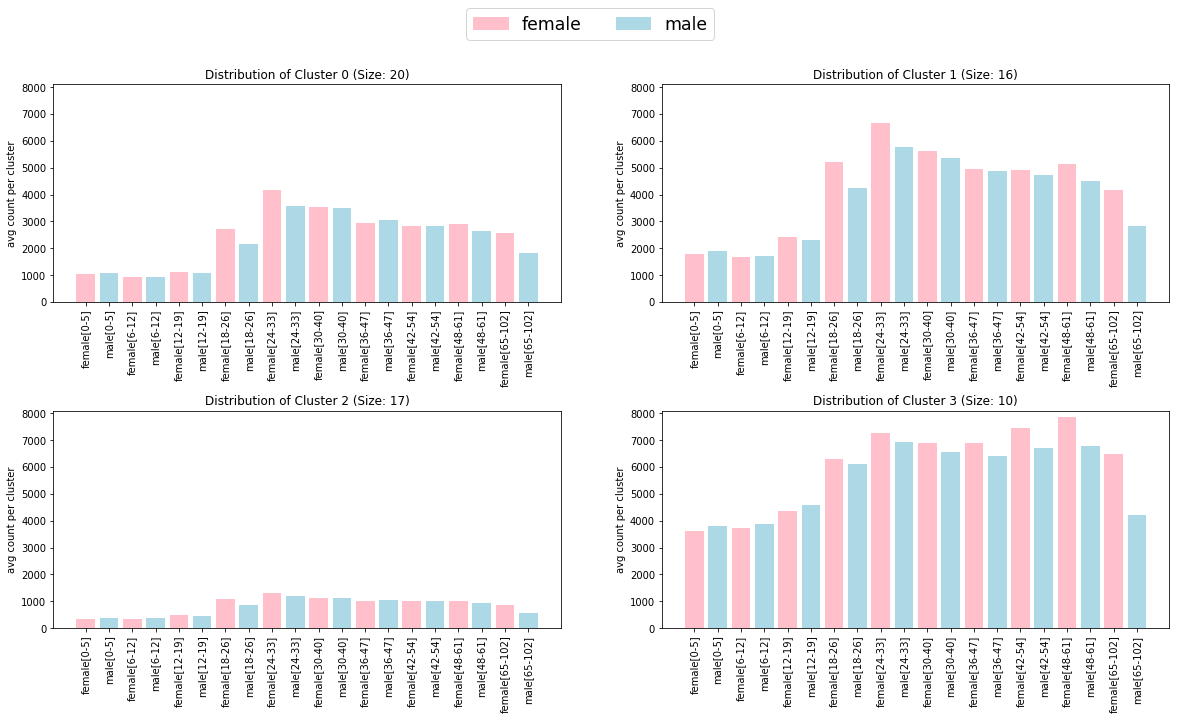

In [110]:
plt.figure(figsize=(20,10))
plt.subplots_adjust(hspace=0.5)
plt.subplot(2,2,1); plot_cluster_distribution(cluster_idx=0)
plt.subplot(2,2,2); plot_cluster_distribution(cluster_idx=1)
plt.subplot(2,2,3); plot_cluster_distribution(cluster_idx=2)
plt.subplot(2,2,4); plot_cluster_distribution(cluster_idx=3)
pink_bar = mpatches.Patch(color='pink', label='female')
blue_bar = mpatches.Patch(color='lightblue', label='male')
plt.figlegend(handles=[pink_bar, blue_bar], loc='upper center', ncol=2, fontsize='xx-large')
plt.show()